In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [3]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bag.fit(X_train, y_train)
bag.fit(X_test, y_test)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [6]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

models = {
    "Bagging": bag,
    "Random Forest": rf,
    "AdaBoost": ada,
    "Gradient Boosting": gb
}
result = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    F1_score = f1_score(y_test, y_pred, average='weighted') 

    result[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": F1_score
    }
result_df = pd.DataFrame(result).T
print(result_df)

                   Accuracy  Precision  Recall  F1 Score
Bagging                 1.0    1.00000     1.0  1.000000
Random Forest           1.0    1.00000     1.0  1.000000
AdaBoost                0.9    0.91875     0.9  0.888506
Gradient Boosting       1.0    1.00000     1.0  1.000000


<Axes: title={'center': 'Model Performance Comparison'}>

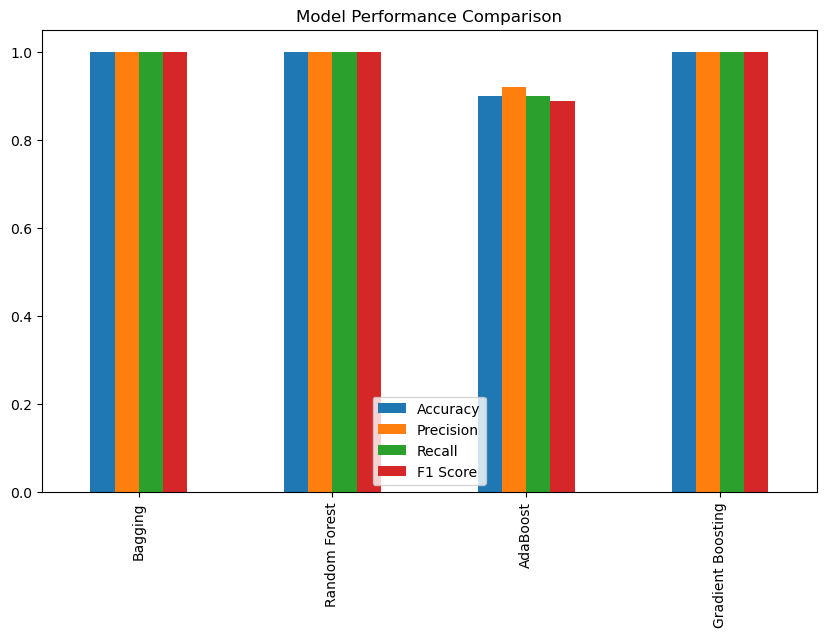

In [11]:
result_df.plot(kind='bar', figsize=(10,6), title='Model Performance Comparison')